# INDE 535 - Project

## Comments

#### Cleaning and Preprocessing:

Before starting building the models, we had to preprocess the data and conduct some feature engineering to extract useful inputs from the data and to transform the data into a readable format by the machine learning algorithms. We started by inspecting the data by looking for null values which apparently were plenty. We filled NA values depending the variable type. For example we replaced null values in the 'countries' column with 'unknown' and missing value in datetime variables with a toy value '1/1/1900 12:00'. Next, we transformed the variables into their applicable data type. For instance, 'message_type' and 'call_center_status' into a category, and 'display_time' and 'first_session_start_time' into a datetime format. After that, we conducted some exploratory data analysis to catch patterns in our data and to understand the relationships between the independent variables and the dependent variable. Next, we extracted the different components from the date variables by putting the 'year', 'month', 'day', 'hour', and 'minute' each in a seperate column because it's very difficult to encode the whole date variable at once. Then, for simplicity, we extracted the final component from the URL variable by using regular expressions. In addition, we transformed the ID variable into a cleaner one by factorizing it. 

#### Preparation:

First, we splitted the variables into X and y which represent the predictor variables and the target variable respectively. We used all the variables given in the dataset except for the target variable as our predictor variables. 
Since Machine Learning Models can't read strings, we had to perform Ordinal Encoding to transform text into number. Moreover, we also did feature scaling (MinMax Scaler) to standardize the data to have a better model performance. We used the pipeline functionality of sklearn to do so since it was more convenient.

#### Model Building - Phase 1:

We started first by building three models: Logistic Regression, Multinomial Naive Bayes, and KNeighbors Classifier. The score were as folllows:

            1- Logistic Regression: 98%
            2- Multinomial Naive Bayes: 98%
            3- KNearest Neighbors: 98%

After looking at the Confusion Matrix, we noticed a weird result. The Contact (value = 1) value had very low precision and recall scores. After inspecting, we noticed that 'Label 1' had very low instances (4455) compared with 'Label 0' which had very high occurences (234541). This led the models to have a high bias towards 'Label 0' and accordingly led to a misclassification of 'Label 1'. This is called 'Imbalanced Classification'. 

#### Model Building - Phase 2:

To overcome this problem, we research some techniques to deal with such scenarios. Accordingly, we decided to test an oversampling technque called (SMOTE) which basically increases the occurences of the minority sample based on a certain algorithm. We then retrained our Logistic Regression, Naive Bayes, KNearest Neighbors models, and also trained a Random Forest Model. The scores were as follow:

            1- Logistic Regression with SMOTE: 
                                    - Accuracy: 93%
                                    - Label 1 Precision: 5%
                                    - Label 1 Recall: 17%
                                
            2- Multinomial Naive Bayes with SMOTE: 
                                    - Accuracy: 75%
                                    - Label 1 Precision: 4%
                                    - Label 1 Recall: 51%

            3- KNeighbors Classifier with SMOTE: 
                                    - Accuracy: 63%
                                    - Label 1 Precision: 3%
                                    - Label 1 Recall: 51%
                                    
            4- Random Forest with SMOTE: 
                                    - Accuracy: 98%
                                    - Label 1 Precision: 6%
                                    - Label 1 Recall: 0%
                                    
#### Best Model:

Depending on the company's intention, we can pick the best model. If the company cares about having a high overall accuracy regardless about the accuracy of the 'Label 1' class, then they should go with the KNeighbors Classifier trained in phase 1. However, if the company places a high importance on predicting the occurences of 'Label 1', then they should go with the 'Naive Bayes with SMOTE' model stated in phase 2.

#### Statistics

Based on the Exploratory Analysis conducted, we can see that people who access the website through a desktop are more likely to accept a contact offer than those who use a mobile or a tablet. Additionally, people who call while the call center is open are more likely to accept an offer than those who call while the center is closed. Moreover, people who have a display reason of 'id2' and 'id3' are more likely to accept the offer than those with 'id1', 'id4' and 'id5'. Also, people who got a message type of 'id6' and 'id8' are more likely to accept the offer. Finally, it is shown that people who come to the website through 'SEM' and 'Search' are more likely to accept the offer than 'Affiliate'.

#### How do you propose addressing the other questions on what to offer, where, and when to show the offer? 

I propose addressing these question by studying the behaviors of the customers who visit the website. This can be modeled using a clustering model where customers who have similar behaviors should be offered simalar contact offers. Same applies to where to offer and when to show the offer.

#### How would you assess if your entire approach, once conceived, has an actual impact on business? 

This can be measured by monitoring whether the percentage acceptance of contact offers has increased by optimizing the offer placement conditions. Additionally, since the company's main goad is to maximize profits, this can also be monitored by measuring the percentage increase or decrease in the company's overall profits. 

## Importing Libraries and Dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.under_sampling import NearMiss

In [4]:
os.chdir('')

data = pd.read_csv('data.csv')

## Discovering the Dataset

In [5]:
data.head()

,row_id,uid,display_time,landing_page,traffic_source,first_session_start_time,total_visits,previous_session_start_time,current_session_start_time,clicks_before_this_display,previous_displays_this_session,previous_display_time,current_url,country,message_type,response_promise,display_reason,call_center_status,device_type,contact
0,161965,e705b8929e6872a1ea1b4b7a78536c5f,2016-03-09 11:52:52,hidden.org/kcpov/ijrsg,SEM,2016-03-09 11:48:35,1,NaN,2016-03-09 11:48:35,3,0,NaN,hidden.org/kcpov/ijrsg,stnzd,id5,1 minute,id5,Open,mobile,0
1,53467,aec94da87ad2a4ebc7481ae1bc079c36,2016-03-15 19:04:16,hidden.org/,SEM,2016-03-15 19:02:58,1,NaN,2016-03-15 19:02:58,6,1,2016-03-15 19:03:39,hidden.org/pvynf,stnzd,id8,1 minute,id3,Open,tablet,0
2,143773,adb7bbbe44f669b0b0978a793ae49132,2016-03-03 10:54:12,hidden.org/,SEM,2016-03-03 10:52:45,1,NaN,2016-03-03 10:52:45,3,0,NaN,hidden.org/pvynf/ijrsg,stnzd,id4,1 minute,id3,Open,mobile,0
3,80222,2b5c6bf6ef6fec14025c73d2e99321eb,2016-04-30 11:57:18,hidden.org/,Search,2016-04-30 11:54:46,1,NaN,2016-04-30 11:54:46,8,6,2016-04-30 11:56:54,hidden.org/kcpov,stnzd,id1,NaN,id1,Open,mobile,0
4,204635,fddee7e23976e16b8fa3e022e671500b,2016-04-26 10:09:51,hidden.org/,SEM,2016-04-21 12:55:59,2,2016-04-21 12:55:59,2016-04-26 10:09:12,6,1,2016-04-26 10:09:21,hidden.org/bgalf,stnzd,id6,1 minute,id2,Open,desktop,0


In [6]:
print('The Dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The Dataset has 238996 rows and 20 columns


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238996 entries, 0 to 238995
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   row_id                          238996 non-null  int64 
 1   uid                             238996 non-null  object
 2   display_time                    238996 non-null  object
 3   landing_page                    238996 non-null  object
 4   traffic_source                  130613 non-null  object
 5   first_session_start_time        238996 non-null  object
 6   total_visits                    238996 non-null  int64 
 7   previous_session_start_time     80810 non-null   object
 8   current_session_start_time      238996 non-null  object
 9   clicks_before_this_display      238996 non-null  int64 
 10  previous_displays_this_session  238996 non-null  int64 
 11  previous_display_time           92733 non-null   object
 12  current_url                   

In [8]:
data.drop('row_id', axis=1, inplace=True)

In [9]:
data.describe(include=['number'])

,total_visits,clicks_before_this_display,previous_displays_this_session,contact
count,238996.000000,238996.000000,238996.000000,238996.000000
mean,5.810168,4.820909,0.863006,0.018640
std,76.047676,2.960773,1.589227,0.135252
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000
75%,2.000000,6.000000,1.000000,0.000000
max,3652.000000,126.000000,16.000000,1.000000


In [10]:
data.describe(include=['object'])

,uid,display_time,landing_page,traffic_source,first_session_start_time,previous_session_start_time,current_session_start_time,previous_display_time,current_url,country,message_type,response_promise,display_reason,call_center_status,device_type
count,238996,238996,238996,130613,238996,80810,238996,92733,238996,231869,238996,201898,238996,238996,237435
unique,135024,222780,556,3,132321,52026,152462,87576,613,92,9,3,5,2,3
top,04edbaee2e5f1029ec81e0d3030a75bc,2016-03-01 12:15:27,hidden.org/,SEM,2015-11-14 07:14:04,2016-01-12 14:35:23,2016-03-03 12:49:36,2016-03-02 14:45:51,hidden.org/,stnzd,id6,1 minute,id2,Open,desktop
freq,117,5,167594,69848,117,11,14,4,29565,218561,92163,193138,111683,230236,155253


## Null Values

In [11]:
data.isnull().sum()

uid                                    0
display_time                           0
landing_page                           0
traffic_source                    108383
first_session_start_time               0
total_visits                           0
previous_session_start_time       158186
current_session_start_time             0
clicks_before_this_display             0
previous_displays_this_session         0
previous_display_time             146263
current_url                            0
country                             7127
message_type                           0
response_promise                   37098
display_reason                         0
call_center_status                     0
device_type                         1561
contact                                0
dtype: int64

In [12]:
data['traffic_source'].fillna('unkown',inplace=True)
data['previous_session_start_time'].fillna('1/1/1900 12:00',inplace=True)
data['previous_display_time'].fillna('1/1/1900 12:00',inplace=True)
data['country'].fillna('unknown',inplace=True)
data['response_promise'].fillna('no_promise',inplace=True)
data['device_type'].fillna('unknown',inplace=True)

In [13]:
data.isnull().sum()

uid                               0
display_time                      0
landing_page                      0
traffic_source                    0
first_session_start_time          0
total_visits                      0
previous_session_start_time       0
current_session_start_time        0
clicks_before_this_display        0
previous_displays_this_session    0
previous_display_time             0
current_url                       0
country                           0
message_type                      0
response_promise                  0
display_reason                    0
call_center_status                0
device_type                       0
contact                           0
dtype: int64

## Converting Data Types

In [14]:
data["uid"] = data["uid"].astype("string")
data['display_time'] = pd.to_datetime(data['display_time'])
data["landing_page"] = data["landing_page"].astype("string")
data["traffic_source"] = data["traffic_source"].astype("category")
data['first_session_start_time'] = pd.to_datetime(data['first_session_start_time'])
data["total_visits"] = data["total_visits"].astype("int")
data['previous_session_start_time'] = pd.to_datetime(data['previous_session_start_time'])
data['current_session_start_time'] = pd.to_datetime(data['current_session_start_time'])
data["clicks_before_this_display"] = data["clicks_before_this_display"].astype("int")
data["previous_displays_this_session"] = data["previous_displays_this_session"].astype("int")
data['previous_display_time'] = pd.to_datetime(data['previous_display_time'])
data["current_url"] = data["current_url"].astype("string")
data["country"] = data["country"].astype("string")
data["message_type"] = data["message_type"].astype("category")
data["response_promise"] = data["response_promise"].astype("string")
data["display_reason"] = data["display_reason"].astype("category")
data["call_center_status"] = data["call_center_status"].astype("category")
data["device_type"] = data["device_type"].astype("category")
data["contact"] = data["contact"].astype("category")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238996 entries, 0 to 238995
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   uid                             238996 non-null  string        
 1   display_time                    238996 non-null  datetime64[ns]
 2   landing_page                    238996 non-null  string        
 3   traffic_source                  238996 non-null  category      
 4   first_session_start_time        238996 non-null  datetime64[ns]
 5   total_visits                    238996 non-null  int32         
 6   previous_session_start_time     238996 non-null  datetime64[ns]
 7   current_session_start_time      238996 non-null  datetime64[ns]
 8   clicks_before_this_display      238996 non-null  int32         
 9   previous_displays_this_session  238996 non-null  int32         
 10  previous_display_time           238996 non-null  datetim

## Exploratory Data Analysis

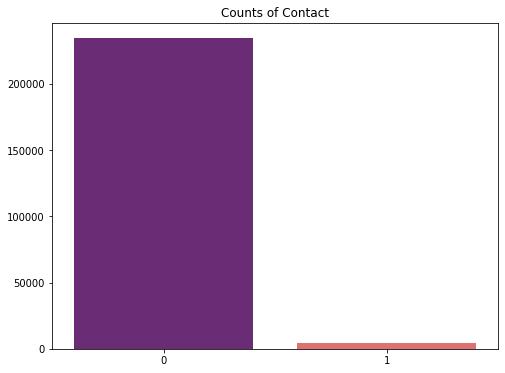

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'contact', data = data, order = data.contact.value_counts().index, palette='magma')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Contact')

plt.show()

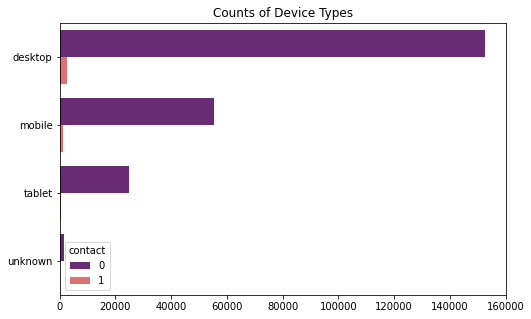

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(y = 'device_type', data = data, order = data.device_type.value_counts().index, palette='magma', hue='contact')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Device Types')

plt.show()

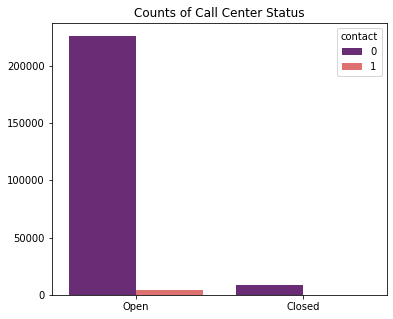

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'call_center_status', data = data, order = data.call_center_status.value_counts().index, palette='magma', 
              hue='contact')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Call Center Status')

plt.show()

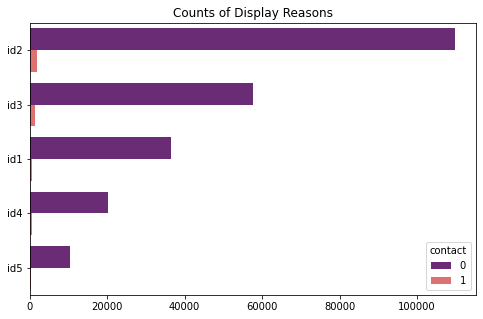

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(y = 'display_reason', data = data, order = data.display_reason.value_counts().index, palette='magma', 
              hue='contact')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Display Reasons')

plt.show()

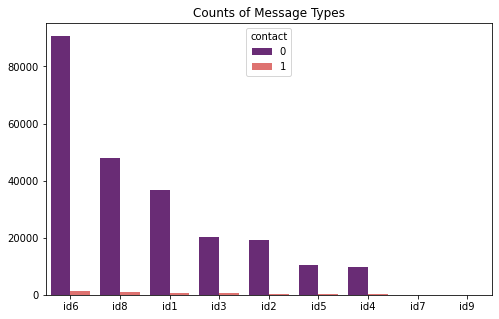

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'message_type', data = data, order = data.message_type.value_counts().index, palette='magma', hue='contact')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Message Types')

plt.show()

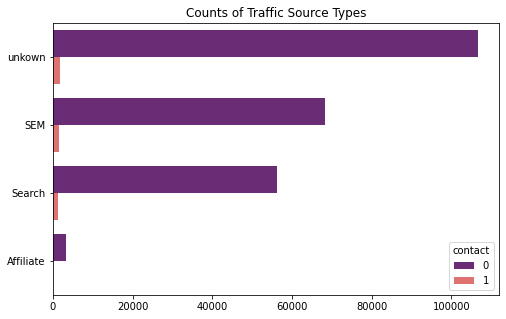

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(y = 'traffic_source', data = data, order = data.traffic_source.value_counts().index, palette='magma', 
              hue='contact')

plt.xlabel('')
plt.ylabel('')
plt.title('Counts of Traffic Source Types')

plt.show()

<AxesSubplot:xlabel='contact', ylabel='previous_displays_this_session'>

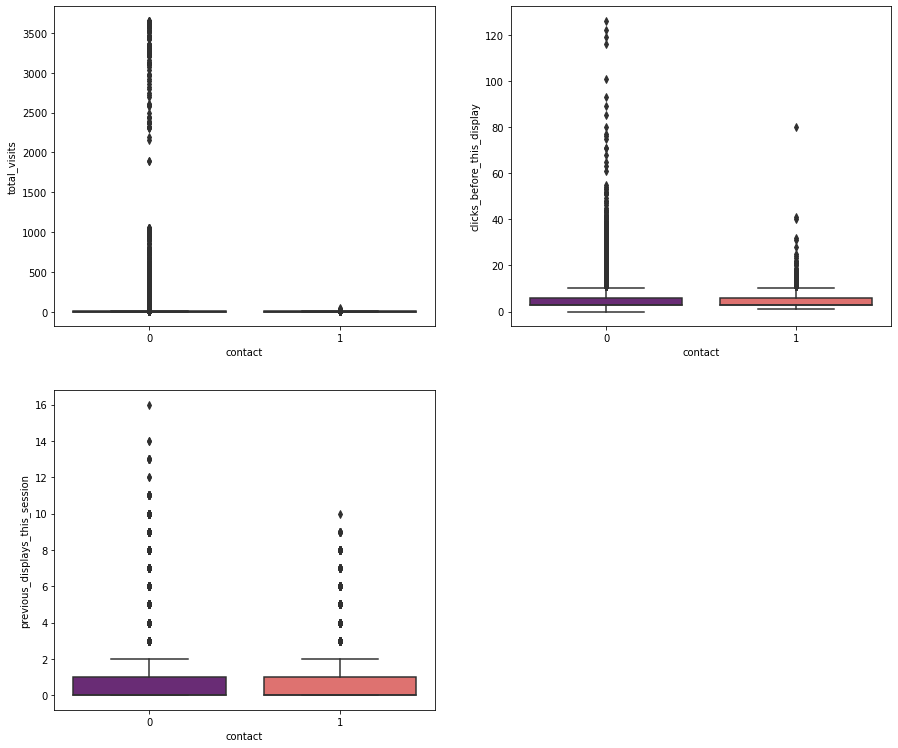

In [22]:
fig=plt.figure(figsize=(15,20))

fig.add_subplot(3, 2, 1)
sns.boxplot(x='contact', y='total_visits', data = data, palette='magma')
fig.add_subplot(3, 2, 2)
sns.boxplot(x='contact', y='clicks_before_this_display', data = data, palette='magma')
fig.add_subplot(3, 2, 3)
sns.boxplot(x='contact', y='previous_displays_this_session', data = data, palette='magma')

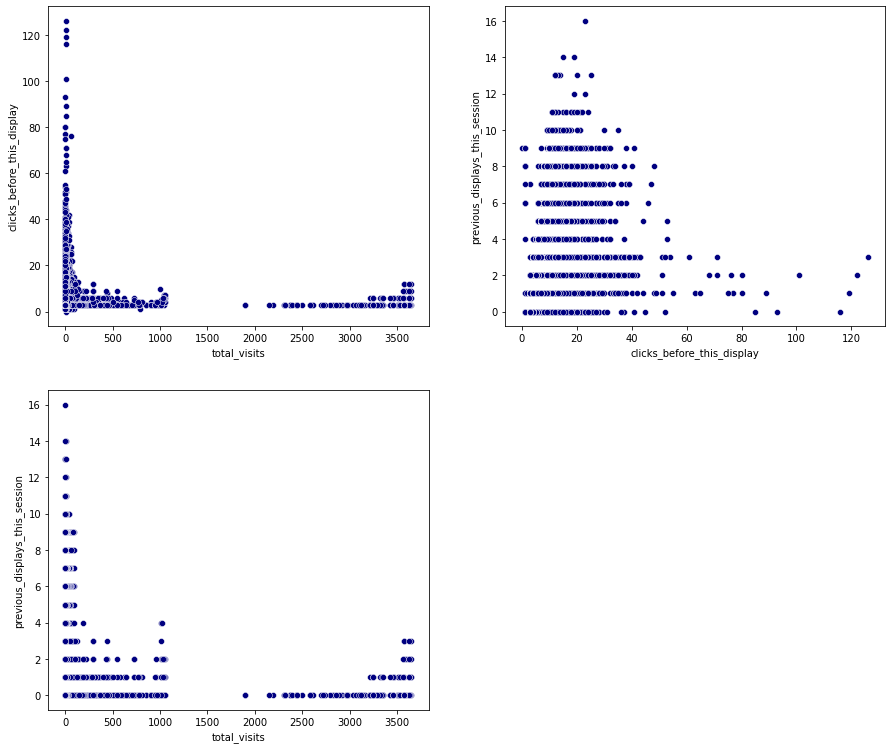

In [23]:
fig=plt.figure(figsize=(15,20))

fig.add_subplot(3, 2, 1)
sns.scatterplot(x='total_visits', y='clicks_before_this_display', data = data, color='navy')
fig.add_subplot(3, 2, 2)
sns.scatterplot(x='clicks_before_this_display', y='previous_displays_this_session', data = data, color='navy')
fig.add_subplot(3, 2, 3)
sns.scatterplot(x='total_visits', y='previous_displays_this_session', data = data, color='navy')

plt.show()

In [24]:
data.head()

,uid,display_time,landing_page,traffic_source,first_session_start_time,total_visits,previous_session_start_time,current_session_start_time,clicks_before_this_display,previous_displays_this_session,previous_display_time,current_url,country,message_type,response_promise,display_reason,call_center_status,device_type,contact
0,e705b8929e6872a1ea1b4b7a78536c5f,2016-03-09 11:52:52,hidden.org/kcpov/ijrsg,SEM,2016-03-09 11:48:35,1,1900-01-01 12:00:00,2016-03-09 11:48:35,3,0,1900-01-01 12:00:00,hidden.org/kcpov/ijrsg,stnzd,id5,1 minute,id5,Open,mobile,0
1,aec94da87ad2a4ebc7481ae1bc079c36,2016-03-15 19:04:16,hidden.org/,SEM,2016-03-15 19:02:58,1,1900-01-01 12:00:00,2016-03-15 19:02:58,6,1,2016-03-15 19:03:39,hidden.org/pvynf,stnzd,id8,1 minute,id3,Open,tablet,0
2,adb7bbbe44f669b0b0978a793ae49132,2016-03-03 10:54:12,hidden.org/,SEM,2016-03-03 10:52:45,1,1900-01-01 12:00:00,2016-03-03 10:52:45,3,0,1900-01-01 12:00:00,hidden.org/pvynf/ijrsg,stnzd,id4,1 minute,id3,Open,mobile,0
3,2b5c6bf6ef6fec14025c73d2e99321eb,2016-04-30 11:57:18,hidden.org/,Search,2016-04-30 11:54:46,1,1900-01-01 12:00:00,2016-04-30 11:54:46,8,6,2016-04-30 11:56:54,hidden.org/kcpov,stnzd,id1,no_promise,id1,Open,mobile,0
4,fddee7e23976e16b8fa3e022e671500b,2016-04-26 10:09:51,hidden.org/,SEM,2016-04-21 12:55:59,2,2016-04-21 12:55:59,2016-04-26 10:09:12,6,1,2016-04-26 10:09:21,hidden.org/bgalf,stnzd,id6,1 minute,id2,Open,desktop,0


## Dealing with Time Variables

In [25]:
data['display_time_year'] = data['display_time'].dt.year
data['display_time_month'] = data['display_time'].dt.month
data['display_time_day'] = data['display_time'].dt.day
data['display_time_hour'] = data['display_time'].dt.hour
data['display_time_minute'] = data['display_time'].dt.minute

data['first_session_start_time_year'] = data['first_session_start_time'].dt.year
data['first_session_start_time_month'] = data['first_session_start_time'].dt.month
data['first_session_start_time_day'] = data['first_session_start_time'].dt.day
data['first_session_start_time_hour'] = data['first_session_start_time'].dt.hour
data['first_session_start_time_minute'] = data['first_session_start_time'].dt.minute

data['previous_session_start_time_year'] = data['previous_session_start_time'].dt.year
data['previous_session_start_time_month'] = data['previous_session_start_time'].dt.month
data['previous_session_start_time_day'] = data['previous_session_start_time'].dt.day
data['previous_session_start_time_hour'] = data['previous_session_start_time'].dt.hour
data['previous_session_start_time_minute'] = data['previous_session_start_time'].dt.minute

data['current_session_start_time_year'] = data['current_session_start_time'].dt.year
data['current_session_start_time_month'] = data['current_session_start_time'].dt.month
data['current_session_start_time_day'] = data['current_session_start_time'].dt.day
data['current_session_start_time_hour'] = data['current_session_start_time'].dt.hour
data['current_session_start_time_minute'] = data['current_session_start_time'].dt.minute

data['previous_display_time_year'] = data['previous_display_time'].dt.year
data['previous_display_time_month'] = data['previous_display_time'].dt.month
data['previous_display_time_day'] = data['previous_display_time'].dt.day
data['previous_display_time_hour'] = data['previous_display_time'].dt.hour
data['previous_display_time_minute'] = data['previous_display_time'].dt.minute

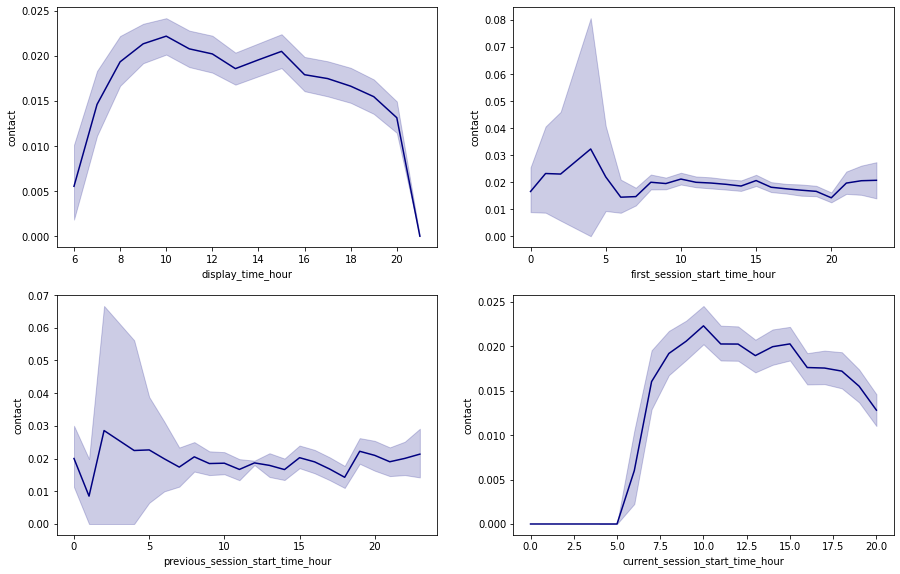

In [26]:
fig=plt.figure(figsize=(15,15))

fig.add_subplot(3, 2, 1)
sns.lineplot(x=data['display_time_hour'], y=data['contact']==1, data = data, color='navy')
fig.add_subplot(3, 2, 2)
sns.lineplot(x=data['first_session_start_time_hour'],y=data['contact']==1, data = data, color='navy')
fig.add_subplot(3, 2, 3)
sns.lineplot(x=data['previous_session_start_time_hour'], y=data['contact']==1, data = data, color='navy')
fig.add_subplot(3, 2, 4)
sns.lineplot(x=data['current_session_start_time_hour'], y=data['contact']==1, data = data, color='navy')

plt.show()

## Dealing with the URLs

In [27]:
f1 = lambda x: x["landing_page"].split("/")[-1]
data['landing_page'] = data.apply(f1, axis=1)

In [28]:
f2 = lambda x: x["current_url"].split("/")[-1]
data['current_url'] = data.apply(f2, axis=1)

In [29]:
data.landing_page.replace(r'^\s*$', 'home', regex=True, inplace = True)
data.current_url.replace(r'^\s*$', 'home', regex=True, inplace = True)

## Dealing with the ID Variable

In [30]:
data['uid'] = pd.factorize(data['uid'], sort=True)[0] + 1 

In [31]:
data.groupby('uid')['contact'].value_counts()

uid     contact
1       0           3
2       0           4
3       0           2
4       0           1
5       0           2
                   ..
135020  0          11
135021  0           1
135022  0           2
135023  0           1
135024  0           1
Name: contact, Length: 136726, dtype: int64

In [32]:
data["uid"] = data["uid"].astype("category")
print(data['uid'].dtype)

category


## Dropping Not Needed Columns

In [33]:
data.drop(['display_time', 
           'first_session_start_time', 
           'previous_session_start_time', 
           'current_session_start_time', 
           'previous_display_time'], axis=1, inplace=True)

In [34]:
data.head()

,uid,landing_page,traffic_source,total_visits,clicks_before_this_display,previous_displays_this_session,current_url,country,message_type,response_promise,...,current_session_start_time_year,current_session_start_time_month,current_session_start_time_day,current_session_start_time_hour,current_session_start_time_minute,previous_display_time_year,previous_display_time_month,previous_display_time_day,previous_display_time_hour,previous_display_time_minute
0,121749,ijrsg,SEM,1,3,0,ijrsg,stnzd,id5,1 minute,...,2016,3,9,11,48,1900,1,1,12,0
1,92118,home,SEM,1,6,1,pvynf,stnzd,id8,1 minute,...,2016,3,15,19,2,2016,3,15,19,3
2,91561,home,SEM,1,3,0,ijrsg,stnzd,id4,1 minute,...,2016,3,3,10,52,1900,1,1,12,0
3,23108,home,Search,1,8,6,kcpov,stnzd,id1,no_promise,...,2016,4,30,11,54,2016,4,30,11,56
4,133876,home,SEM,2,6,1,bgalf,stnzd,id6,1 minute,...,2016,4,26,10,9,2016,4,26,10,9


## Splitting the Dataset

In [35]:
X = data.drop('contact', axis = 1)
y = data[['contact']]

In [36]:
train, valid, train_labels, valid_labels = train_test_split(X, y, test_size = 0.2, stratify = y)

In [37]:
train.shape, valid.shape, train_labels.shape, valid_labels.shape

((191196, 38), (47800, 38), (191196, 1), (47800, 1))

## Preparing for the Models

In [38]:
train_num = train.select_dtypes(include=[np.number])
train_cat = train.select_dtypes(exclude=[np.number])

num_attribs = list(train_num)
cat_attribs = list(train_cat) 

In [39]:
num_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler())])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)])


train_prepared = full_pipeline.fit_transform(train)
valid_prepared = full_pipeline.transform(valid)

In [40]:
print(train_prepared.shape) 
print(train_labels.shape)
print(valid_prepared.shape) 
print(valid_labels.shape)

(191196, 116755)
(191196, 1)
(47800, 116755)
(47800, 1)


## 1. Logistic Regression

In [39]:
log_reg = LogisticRegression()
log_reg.fit(train_prepared, train_labels)
y_pred_log_reg = log_reg.predict(valid_prepared)

In [40]:
CM_log_reg = confusion_matrix(y_true = valid_labels, y_pred = y_pred_log_reg)
print(CM_log_reg)

[[46909     0]
 [  891     0]]


In [41]:
print(classification_report(valid_labels, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     46909
           1       0.00      0.00      0.00       891

    accuracy                           0.98     47800
   macro avg       0.49      0.50      0.50     47800
weighted avg       0.96      0.98      0.97     47800



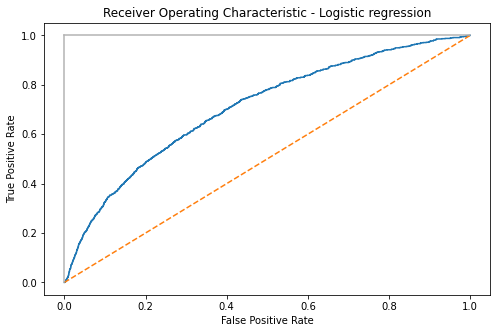

In [83]:
y_proba_log_reg = log_reg.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_log_reg)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Multinomial Naive Bayes

In [43]:
mnb = MultinomialNB()
mnb.fit(train_prepared, train_labels)
y_pred_mnb = mnb.predict(valid_prepared)

In [44]:
CM_mnb = confusion_matrix(y_true = valid_labels, y_pred = y_pred_mnb)
print(CM_mnb)

[[46909     0]
 [  891     0]]


In [45]:
print(classification_report(valid_labels, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     46909
           1       0.00      0.00      0.00       891

    accuracy                           0.98     47800
   macro avg       0.49      0.50      0.50     47800
weighted avg       0.96      0.98      0.97     47800



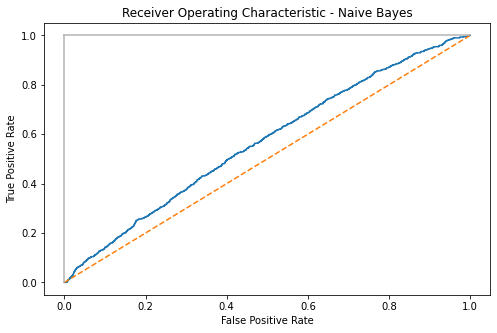

In [84]:
y_proba_mnb = mnb.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_mnb)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. KNeighbors Classifier

In [47]:
knn = KNeighborsClassifier()
knn.fit(train_prepared, train_labels)
y_pred_knn = knn.predict(valid_prepared)

In [48]:
CM_knn = confusion_matrix(y_true = valid_labels, y_pred = y_pred_knn)
print(CM_knn)

[[46885    24]
 [  888     3]]


In [49]:
print(classification_report(valid_labels, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     46909
           1       0.11      0.00      0.01       891

    accuracy                           0.98     47800
   macro avg       0.55      0.50      0.50     47800
weighted avg       0.97      0.98      0.97     47800



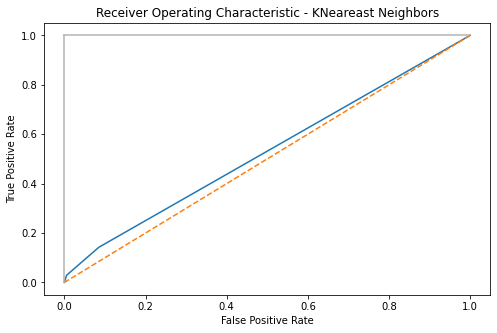

In [85]:
y_proba_knn = knn.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_knn)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - KNeareast Neighbors')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### There is an Imbalanced Data Classes Problem

## 4. Balanced Support Vector Classifier

In [51]:
# svc_reg = SVC(class_weight='balanced')
# svc_reg.fit(train_prepared, train_labels)
# y_pred_svc_reg = svc_reg.predict(valid_prepared)

In [52]:
# CM_svc_reg = confusion_matrix(y_true = valid_labels, y_pred = y_pred_svc_reg)
# print(CM_svc_reg)

In [53]:
# print(classification_report(valid_labels, y_pred_svc_reg))

In [ ]:
# y_proba_svc = svc_reg.predict_proba(valid_prepared)[:,1]
# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_svc)

# plt.figure(figsize=(8,5))
# plt.title('Receiver Operating Characteristic - SVC')
# plt.plot(false_positive_rate1, true_positive_rate1)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

## 5. Logistic Regression with Over-Sampling: SMOTE

In [55]:
sm = SMOTE(random_state = 2)
train_prepared_res, train_labels_res = sm.fit_resample(train_prepared, train_labels)
train_labels_res.value_counts()

contact
0          187632
1          187632
dtype: int64

In [56]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(train_prepared_res, train_labels_res)
y_pred_log_reg_smote = log_reg_smote.predict(valid_prepared)

In [57]:
CM_log_reg_smote = confusion_matrix(y_true = valid_labels, y_pred = y_pred_log_reg_smote)
print(CM_log_reg_smote)

[[44329  2580]
 [  742   149]]


In [58]:
print(classification_report(valid_labels, y_pred_log_reg_smote))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     46909
           1       0.05      0.17      0.08       891

    accuracy                           0.93     47800
   macro avg       0.52      0.56      0.52     47800
weighted avg       0.97      0.93      0.95     47800



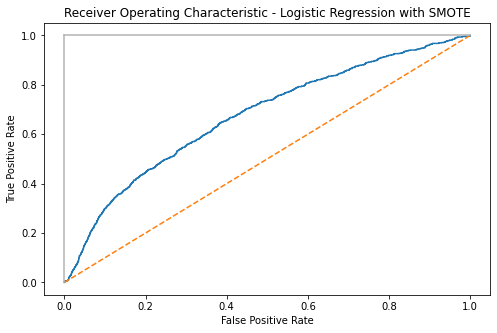

In [86]:
y_proba_log_smote = log_reg_smote.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_log_smote)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - Logistic Regression with SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6. Multinomial Naive Bayes with Over-Sampling: SMOTE

In [60]:
sm = SMOTE(random_state = 2)
train_prepared_res, train_labels_res = sm.fit_resample(train_prepared, train_labels)
train_labels_res.value_counts()

contact
0          187632
1          187632
dtype: int64

In [61]:
mnb_smote = MultinomialNB()
mnb_smote.fit(train_prepared_res, train_labels_res)
y_pred_mnb_smote = mnb_smote.predict(valid_prepared)

In [62]:
CM_mnb_smote = confusion_matrix(y_true = valid_labels, y_pred = y_pred_mnb_smote)
print(CM_mnb_smote)

[[35473 11436]
 [  436   455]]


In [63]:
print(classification_report(valid_labels, y_pred_mnb_smote))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     46909
           1       0.04      0.51      0.07       891

    accuracy                           0.75     47800
   macro avg       0.51      0.63      0.46     47800
weighted avg       0.97      0.75      0.84     47800



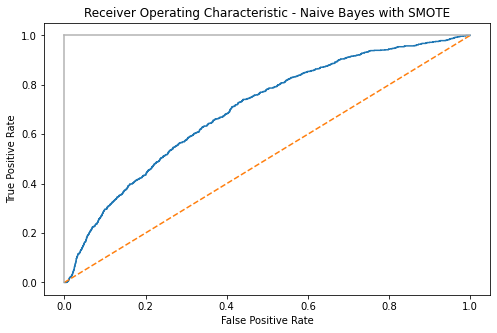

In [87]:
y_proba_mnb_smote = mnb_smote.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_mnb_smote)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - Naive Bayes with SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 7. KNeighbors Classifier with Over-Sampling: SMOTE

In [65]:
sm = SMOTE(random_state = 2)
train_prepared_res, train_labels_res = sm.fit_resample(train_prepared, train_labels)
train_labels_res.value_counts()

contact
0          187632
1          187632
dtype: int64

In [66]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(train_prepared_res, train_labels_res)
y_pred_knn_smote = knn_smote.predict(valid_prepared)

In [67]:
CM_knn_smote = confusion_matrix(y_true = valid_labels, y_pred = y_pred_knn_smote)
print(CM_knn_smote)

[[29851 17058]
 [  438   453]]


In [68]:
print(classification_report(valid_labels, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.99      0.64      0.77     46909
           1       0.03      0.51      0.05       891

    accuracy                           0.63     47800
   macro avg       0.51      0.57      0.41     47800
weighted avg       0.97      0.63      0.76     47800



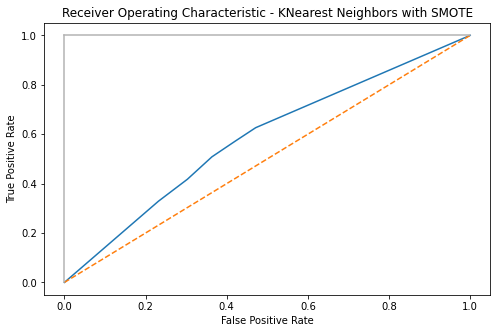

In [88]:
y_proba_knn_smote = knn_smote.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_knn_smote)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - KNearest Neighbors with SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8. Random Forest with Over-Sampling: SMOTE

In [74]:
sm = SMOTE(random_state = 2)
train_prepared_res, train_labels_res = sm.fit_resample(train_prepared, train_labels)
train_labels_res.value_counts()

contact
0          187632
1          187632
dtype: int64

In [75]:
rfc_smote = RandomForestClassifier()
rfc_smote.fit(train_prepared_res, train_labels_res)
y_pred_rfc_smote = rfc_smote.predict(valid_prepared)

In [76]:
CM_rfc_smote = confusion_matrix(y_true = valid_labels, y_pred = y_pred_rfc_smote)
print(CM_rfc_smote)

[[46893    16]
 [  890     1]]


In [77]:
print(classification_report(valid_labels, y_pred_rfc_smote))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     46909
           1       0.06      0.00      0.00       891

    accuracy                           0.98     47800
   macro avg       0.52      0.50      0.50     47800
weighted avg       0.96      0.98      0.97     47800



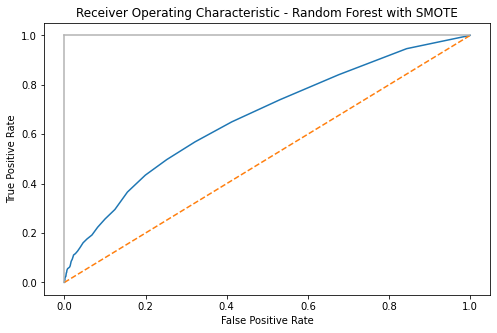

In [89]:
y_proba_rfc_smote = rfc_smote.predict_proba(valid_prepared)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(valid_labels, y_proba_rfc_smote)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic - Random Forest with SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()